<a href="https://colab.research.google.com/github/BethanyJep/Manipulating-and-Cleaning-Talk/blob/main/Manipulating_and_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulating and Cleaning Data

## Importing and Exploring DataFrame Information

* DataFrame.info()
* DataFrame.head()
* DataFrame.tail()

In [3]:
# if the libraries are not installed, use pip install on the terminal to install the necessary libraries
# pip install pandas
# pip install sklearn.datasets

In [8]:
#importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris

#Loading data
iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [9]:
#what is contained in the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
#first values of the data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
#last 5 values of data
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [12]:
#EXERCISE: printing more than just 5 values
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
iris_df.shape

(150, 4)

Even by looking at the metadata about the information in a DataFrame, or the first and last few values in one, you can get an initial idea about the size, shape, and content of the data with which you are dealing.

## Dealing with missing and null data

Real-world data is messy. 
You will likely need to combine several data sources to get the data you actually want. The data from those sources will be incomplete. And it will likely not be formatted in exactly the way you want in order to perform your analysis. It's for these reasons that most data scientists will tell you that about 80 percent of any project is spent just getting the data into a form ready for analysis.

Types of null data (Read more on how python and numpy deal with None and NAN values)

*   None: non-float missing data
*   NaN (Not a Number): missing float values

some of the core methods you will use to deal with missing values in pandas reflect this idea in their names:

* isnull(): Generates a Boolean mask indicating missing values
* notnull(): Opposite of isnull()
* dropna(): Returns a filtered version of the data
* fillna(): Returns a copy of the data with missing values filled or imputed



In [14]:
#checking for missing data
import numpy as np

example3 = pd.Series([0, np.nan, '', None])
example3

0       0
1     NaN
2        
3    None
dtype: object

In [15]:
example3.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [16]:
example3.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [17]:
#dropping null values
example3 = example3.dropna()
example3

0    0
2     
dtype: object

In [18]:
example4 = pd.DataFrame([[1,      np.nan, 7], 
                         [2,      5,      8], 
                         [np.nan, 6,      9]])
example4

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


In [19]:
#You cannot drop a single value from a DataFrame, so you have to drop full rows or columns.
example4.dropna()

,0,1,2
1,2.0,5.0,8


In [20]:
#Specifying how you will drop the values 
example4.dropna(axis='columns')

,2
0,7
1,8
2,9


In [26]:
example4.dropna?

Signature: example4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. versionchanged:: 1.0.0

       Pass tuple or list to drop on multiple axes.
       Only a single axis is allowed.

how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.

thresh : int, optional
    Require that many non-NA values.
subset : array-like,

In [27]:
#filling null values 
example5 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
example5

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [28]:
example5.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [29]:
#forward fill - which is to use the last valid value to fill a null
example5.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [ ]:
#back-fill to propagate the next valid value backward to fill a null:
example5.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [30]:
#Identifying duplicates: duplicated
example6 = pd.DataFrame({'letters': ['A','B'] * 2 + ['B'],
                         'numbers': [1, 2, 1, 3, 3]})
example6

,letters,numbers
0,A,1
1,B,2
2,A,1
3,B,3
4,B,3


There are multiple ways to deal with missing values in your datasets. The specific strategy you use (removing them, replacing them, or even how you replace them) should be dictated by the particulars of that data. You will develop a better sense of how to deal with missing values the more you handle and interact with datasets.

## Dealing with duplicated data

In addition to missing data, you will often encounter duplicated data in real-world datasets. Fortunately, pandas provides an easy means of detecting and removing duplicate entries.

* Identifying duplicates: duplicated()
* Dropping duplicates: drop_duplicates()




In [ ]:
example6.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
#Dropping duplicates: drop_duplicates
example6.drop_duplicates()

,letters,numbers
0,A,1
1,B,2
3,B,3


## Combining datasets: merge and join

Pandas provides several methods of merging and joining datasets to make this necessary job easier:

* pandas.merge connects rows in DataFrames based on one or more keys.
* pandas.concat concatenates or “stacks” together objects along an axis.
* The combine_first instance method enables you to splice together overlapping data to fill in missing values in one object with values from another.

### One-to-one joins

In [ ]:
df1 = pd.DataFrame({'employee': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'group': ['Accounting', 'Marketing', 'Marketing', 'HR']})
df1

,employee,group
0,Gary,Accounting
1,Stu,Marketing
2,Mary,Marketing
3,Sue,HR


In [ ]:
df2 = pd.DataFrame({'employee': ['Mary', 'Stu', 'Gary', 'Sue'],
                    'hire_date': [2008, 2012, 2017, 2018]})
df2

,employee,hire_date
0,Mary,2008
1,Stu,2012
2,Gary,2017
3,Sue,2018


In [ ]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Gary,Accounting,2017
1,Stu,Marketing,2012
2,Mary,Marketing,2008
3,Sue,HR,2018


### Many-to-one joins

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Marketing', 'HR'],
                    'supervisor': ['Carlos', 'Giada', 'Stephanie']})
df4

,group,supervisor
0,Accounting,Carlos
1,Marketing,Giada
2,HR,Stephanie


In [ ]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Gary,Accounting,2017,Carlos
1,Stu,Marketing,2012,Giada
2,Mary,Marketing,2008,Giada
3,Sue,HR,2018,Stephanie


Again, to avoid ambiguity as to which column to join on, it is a good idea to explicitly tell merge which one to use with the on parameter.

### left_on and right_on keywords

What if you need to merge two datasets with no shared column names? For example, what if you are using a dataset in which the employee name is labeled as 'name' rather than 'employee'? In such cases, you will use the left_on and right_on keywords to specify the column names on which to join:



In [ ]:
df6 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df6

,name,salary
0,Gary,70000
1,Stu,80000
2,Mary,120000
3,Sue,90000


In [ ]:
pd.merge(df1, df6, left_on="employee", right_on="name")

,employee,group,name,salary
0,Gary,Accounting,Gary,70000
1,Stu,Marketing,Stu,80000
2,Mary,Marketing,Mary,120000
3,Sue,HR,Sue,90000


### left_index and right_index keywords

Sometimes it can be more advantageous to merge on an index rather than on a column. The left_index and right_index keywords make it possible to join by index. Let's revisit the earlier example DataFrames to see what this looks like in action.

In [ ]:
df1a = df1.set_index('employee')
df1a

,group
employee,
Gary,Accounting
Stu,Marketing
Mary,Marketing
Sue,HR


In [ ]:
df2a = df2.set_index('employee')
df2a

,hire_date
employee,
Mary,2008
Stu,2012
Gary,2017
Sue,2018


In [ ]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Gary,Accounting,2017
Stu,Marketing,2012
Mary,Marketing,2008
Sue,HR,2018


### Concatenation in NumPy

In [ ]:
#for one-dimensional arrays
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#for two-dimensional arrays
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### Concatenation in pandas

In [ ]:
ser1 = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
ser2 = pd.Series(['d', 'e', 'f'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    a
2    b
3    c
4    d
5    e
6    f
dtype: object

In [ ]:
df9 = pd.DataFrame({'A': ['a', 'c'],
                    'B': ['b', 'd']})
df9

,A,B
0,a,b
1,c,d


In [ ]:

pd.concat([df9, df9])

,A,B
0,a,b
1,c,d
0,a,b
1,c,d


In [ ]:
#re-indexing
pd.concat([df9, df9], ignore_index=True)

,A,B
0,a,b
1,c,d
2,a,b
3,c,d


In [ ]:
#concatenates row-wise within the DataFrame
pd.concat([df9, df9], axis=1)

,A,B,A,B
0,a,b,a,b
1,c,d,c,d


### Concatenation with joins

In [ ]:
df10 = pd.DataFrame({'A': ['a', 'd'],
                     'B': ['b', 'e'],
                     'C': ['c', 'f']})
df10

,A,B,C
0,a,b,c
1,d,e,f


In [ ]:
df11 = pd.DataFrame({'B': ['u', 'x'],
                     'C': ['v', 'y'],
                     'D': ['w', 'z']})
df11

,B,C,D
0,u,v,w
1,x,y,z


In [ ]:
pd.concat([df10, df11])
#default outer join

,A,B,C,D
0,a,b,c,NaN
1,d,e,f,NaN
0,NaN,u,v,w
1,NaN,x,y,z


In [ ]:
pd.concat([df10, df11], join='inner')

,B,C
0,b,c
1,e,f
0,u,v
1,x,y


### append()

In [ ]:
df9.append(df9)

,A,B
0,a,b
1,c,d
0,a,b
1,c,d


# Exploratory statistics and visualization

In [ ]:
 #Boston Housing Dataset  
 
df = pd.read_csv('https://raw.githubusercontent.com/microsoft/Reactors/main/workshop-resources/data-science-and-machine-learning/Data_Science_1/workshop-materials/Data/housing_dataset.csv')
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


This dataset contains information collected from the U.S Census Bureau concerning housing in the area of Boston, Massachusetts and was first published in 1978. The dataset has 14 columns:

* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25,000 square feet
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxides concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centres
* RAD: Index of accessibility to radial highways
* TAX: Full value property tax rate per \$10,000
* PTRATIO: Pupil-to-teacher ratio by town
* LSTAT: Percent of lower status portion of the population
* MEDV: Median value of owner-occupied homes in \$1,000s

In [ ]:
df.shape

(506, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
df['MEDV'].mean()

22.532806324110698

In [ ]:
df['AGE'].median()

77.5

In [ ]:
#relationsjip betweed different columns
df.groupby(['AGE'])['MEDV'].mean()

AGE
2.9      26.600000
6.0      24.100000
6.2      23.400000
6.5      24.700000
6.6      24.750000
           ...    
98.8     14.500000
98.9     13.066667
99.1     10.900000
99.3     17.800000
100.0    16.920930
Name: MEDV, Length: 356, dtype: float64

In [ ]:
#Exercise
# Now try to find the median value for AGE for each value of MEDV.

In [ ]:
#You can also apply a lambda function to each element of a DataFrame column
#you wanted to create a new column that flagged a row if more than 50 percent of owner-occupied homes were built before 1940:
df['AGE_50'] = df['AGE'].apply(lambda x: x>50)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_50
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,True
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,True
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,True
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,True


In [ ]:
#how many values returned true and how many false by using the value_counts method:
df['AGE_50'].value_counts()

True     359
False    147
Name: AGE_50, dtype: int64

In [ ]:
#you can also use groupby to examine
df.groupby(['AGE_50'])['MEDV'].mean()

AGE_50
False    26.693197
True     20.829248
Name: MEDV, dtype: float64

In [ ]:
#You can also group by more than one variable, 
#such AGE_50 (the one you just created), CHAS (whether a town is on the Charles River), 
#and RAD (an index measuring access to the Boston-area radial highways), 
#and then evaluate each group for the average median home price in that group:
groupby_twovar=df.groupby(['AGE_50','RAD','CHAS'])['MEDV'].mean()
groupby_twovar

AGE_50  RAD   CHAS
False   1.0   0.0     24.666667
              1.0     50.000000
        2.0   0.0     33.300000
        3.0   0.0     26.505556
        4.0   0.0     25.376744
              1.0     32.900000
        5.0   0.0     26.302857
              1.0     46.000000
        6.0   0.0     23.575000
        7.0   0.0     28.563636
        8.0   0.0     29.220000
        24.0  0.0     20.766667
True    1.0   0.0     20.185714
        2.0   0.0     24.170588
        3.0   0.0     29.350000
              1.0     27.950000
        4.0   0.0     17.879661
              1.0     21.560000
        5.0   0.0     25.124638
              1.0     25.610000
        6.0   0.0     19.822222
        7.0   0.0     24.433333
        8.0   0.0     32.321429
              1.0     26.000000
        24.0  0.0     15.306612
              1.0     31.362500
Name: MEDV, dtype: float64

In [ ]:
#better vision of the output - wide rather than tall
groupby_twovar.unstack()

CHAS               0.0      1.0
AGE_50 RAD                     
False  1.0   24.666667  50.0000
       2.0   33.300000      NaN
       3.0   26.505556      NaN
       4.0   25.376744  32.9000
       5.0   26.302857  46.0000
       6.0   23.575000      NaN
       7.0   28.563636      NaN
       8.0   29.220000      NaN
       24.0  20.766667      NaN
True   1.0   20.185714      NaN
       2.0   24.170588      NaN
       3.0   29.350000  27.9500
       4.0   17.879661  21.5600
       5.0   25.124638  25.6100
       6.0   19.822222      NaN
       7.0   24.433333      NaN
       8.0   32.321429  26.0000
       24.0  15.306612  31.3625

Let's take a moment to analyze these results in a little depth. The first row reports that communities with less the half of houses built before 1940, with a highway-access index of 1, and that are not situated on the Charles River have a mean housing price of \$24,667 (1970's dollars); the next row shows that for communities similar to the first row except for being located on the Charles River have a mean housing price of \$50,000.

One insight that pops out is that, all else being equal, being located next to the Charles River can significantly increase the value of newer housing stock. The story is more ambiguous for communities dominated by older houses: proximity to the Charles significantly increases home prices in one community (and that one presumably farther away from the city); for all others, being situated on the river either provided a modest increase in value or actually decreased mean home prices.

In [ ]:
#How many unique values are there in a column 
df['CHAS'].nunique()

2

In [ ]:
#what those unique values are
df['CHAS'].unique()

array([0., 1.])

In [ ]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

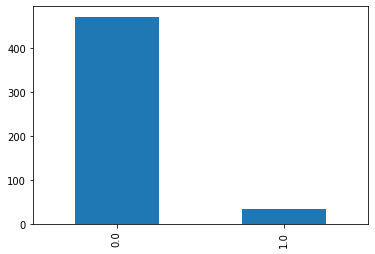

In [ ]:
%matplotlib inline #view the chart inline.

df['CHAS'].value_counts().plot(kind='bar')

In [ ]:
#the extent to which two variables are linearly related
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_50
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,0.452220,-0.385832,0.254574
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.590769
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.516001
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.088659
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.597644
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.164465
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.870348
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.673813
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.361191
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.381395


In [ ]:
#correlations between all the columns and only one variable
#correlation between all other variables and the percentage of owner-occupied houses built before 1940 (AGE)

corr = df.corr(method='pearson')
corr_with_homevalue = corr.iloc[-1]
corr_with_homevalue[corr_with_homevalue.argsort()[::-1]]

AGE_50     1.000000
AGE        0.870348
NOX        0.597644
INDUS      0.516001
LSTAT      0.468146
TAX        0.381395
RAD        0.361191
CRIM       0.254574
PTRATIO    0.236216
CHAS       0.088659
RM        -0.164465
MEDV      -0.289750
ZN        -0.590769
DIS       -0.673813
Name: AGE_50, dtype: float64


With the correlations arranged in descending order, it's easy to see some patterns. Correlating AGE with a variable you created from AGE is a trivial correlation. However, it is interesting to note that the percentage of older housing stock in communities strongly correlates with air pollution (NOX) and the proportion of non-retail business acres per town (INDUS); at least in 1978 metro Boston, older towns are more industrial.

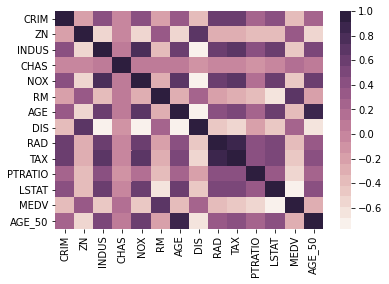

In [ ]:
#correlation heatmap using seaborn
import seaborn as sns
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

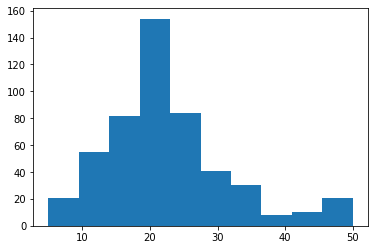

In [ ]:
#Histograms - what is the overall distribution of prices of owner-occupied houses in the Boston area?
import matplotlib.pyplot as plt
plt.hist(df['MEDV'])

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

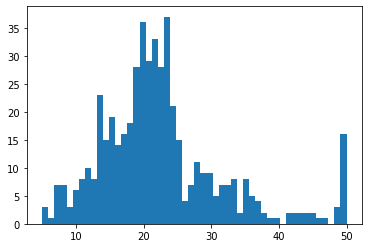

In [ ]:
#To get a finer-grained view of the AGE column, you can manually increase the number of 
#bins (big of buckets of percentages that you include in each histogram bar) in the histogram:
plt.hist(df['MEDV'],bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


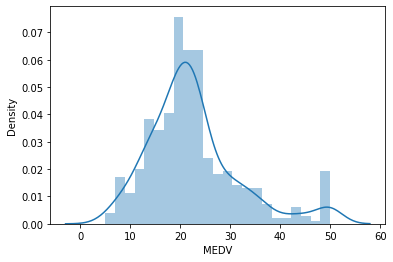

In [ ]:
#seaborn - the distribution plot(a combination histogram and kernel density estimate (KDE) plot (essentially, a smoothed histogram):)
sns.distplot(df['MEDV'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


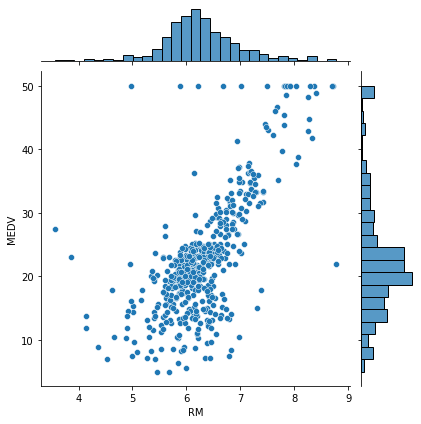

In [ ]:
#Seaborn jointplot - combines histograms for two columns along with a scatterplot:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


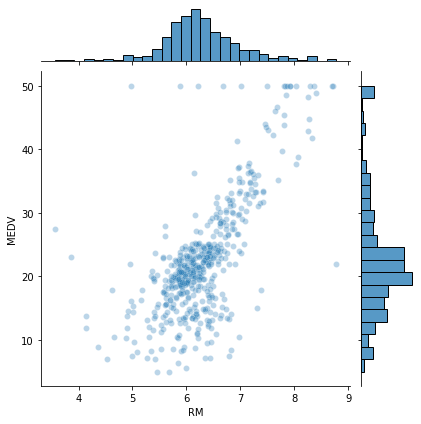

In [ ]:
#Unfortunately, many of the dots print over each other. You can address this by adding some alpha blending, 
#a figure that sets the transparency for the dots so that concentrations of them drawing over one another will be apparent:

sns.jointplot(df['RM'], df['MEDV'], kind='scatter', alpha=0.3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


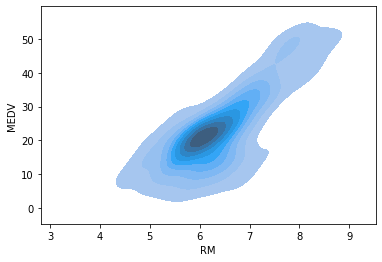

In [ ]:
#Another way to see patterns in your data is with a two-dimensional KDE plot. Darker colors here represent a higher concentration of data points
sns.kdeplot(df['RM'], df['MEDV'], shade=True)

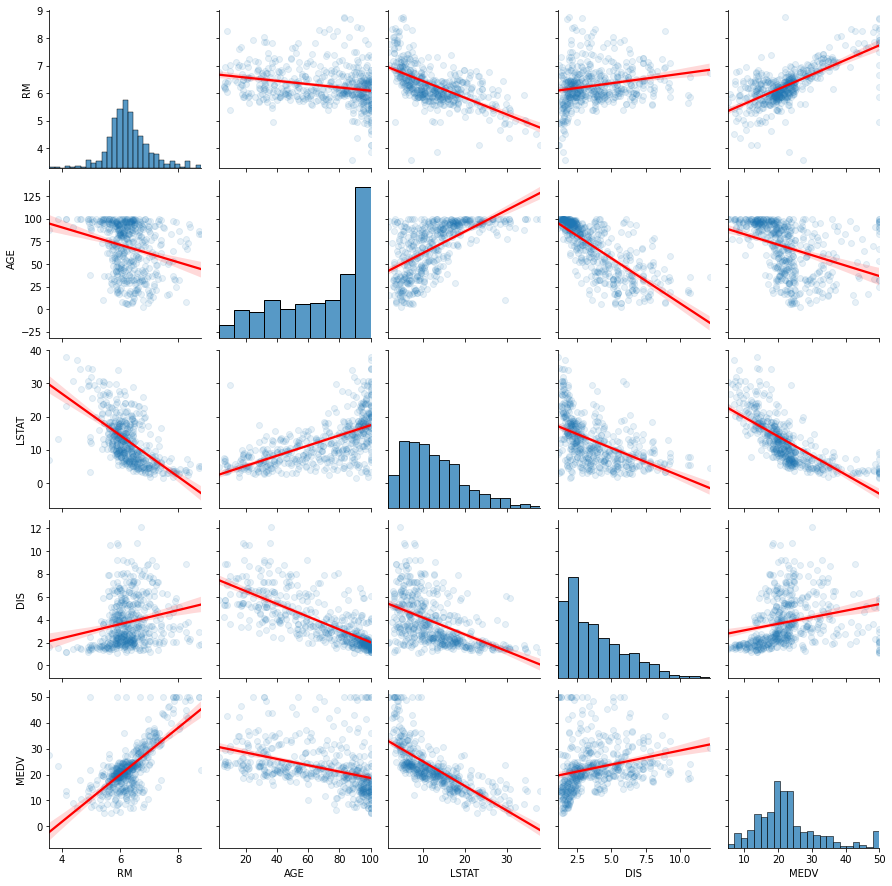

In [ ]:
#Finally, the pairplot in Seaborn allows you to see scatterplots and histograms for several columns in one table.
sns.pairplot(df[['RM', 'AGE', 'LSTAT', 'DIS', 'MEDV']], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Takeaway: An old joke goes, **“What do data scientists see when they look at a dataset? A bunch of numbers.”** There is more than a little truth in that joke. Visualization is often the key to finding patterns and correlations in your data. While visualization cannot deliver precise results, it can point you in the right direction to ask better questions and efficiently find value in the data.